In [1]:
cd /om2/user/leokoz8/code/rnns-of-rnns

/rdma/vast-rdma/vast/fiete/leokoz8/code/rnns-of-rnns


In [87]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.nn import functional as F
import tqdm
from src import models, utils, parametrizations,tasks,running,tasks
import os 
envs, env_names = tasks.load_all_mod_cog_tasks()

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import pickle
filepath = '/om2/user/leokoz8/code/rnns-of-rnns/models/spectral/dlygointr/conformal/perf_over_training.pickle'
file = torch.load(filepath)
#file
base_directory = '/om2/user/leokoz8/code/rnns-of-rnns/models/'

def parse_gw_info(file_path):
    split_path = file_path.split(os.sep)
    intra = split_path[7]
    task = split_path[8]
    inter = split_path[9]
    
    return task, intra, inter

def get_perf_info(perf_curve):
    perf = perf_curve[perf_curve != 0]
    final_perf = perf[-1]
    time_to_finish = len(perf)
    return perf,final_perf,time_to_finish

def find_string_positions(strings_list, target_string):
    positions = []
    for index, string in enumerate(strings_list):
        if string == target_string:
            positions.append(index)

    return positions

def extract_elements_by_indices(input_list, indices):
    extracted_elements = [input_list[index] for index in indices]
    return extracted_elements


In [81]:
# loop over models folder and extract dictionary of {stability constraint, interareal constraint, perf, final perf, time_to_final}

tasks = []
intras = []
inters = []
perfs = []
final_perfs = []
time_to_finishes = []

for root, dirs, files in os.walk(base_directory):
    for i, file in enumerate(files):
        if file == "perf_over_training.pickle":
            
            
            file_path = os.path.join(root, file)
            
            
            task, intra, inter = parse_gw_info(file_path)           
            
            
            tasks.append(task)
            intras.append(intra)
            inters.append(inter)           
            
            
            perf_curve = torch.load(file_path)
            
            perf,final_perf,time_to_finish = get_perf_info(perf_curve)
            
            
            perfs.append(perf.detach().cpu().numpy())
            final_perfs.append(final_perf.item())
            time_to_finishes.append(time_to_finish)


(array([229.,  43.,   7.,   6.,   3.,   1.,   0.,   0.,   0.,  21.]),
 array([  4. ,  43.7,  83.4, 123.1, 162.8, 202.5, 242.2, 281.9, 321.6,
        361.3, 401. ]),
 <BarContainer object of 10 artists>)

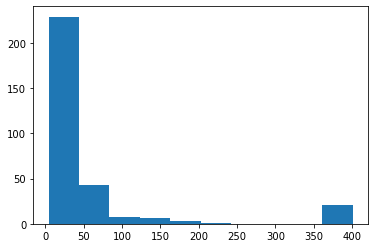

In [123]:
plt.hist(time_to_finishes)

In [77]:
#plt.hist(time_to_finishes,bins = 100);
run_idx = 210
num_configs = len(tasks)


sym_scores = []
sym_tasks = []

spectral_scores = []
spectral_tasks = []

intra_sym_inter_none_scores = []
intra_sym_inter_none_tasks = []

intra_spec_inter_none_scores = []
intra_spec_inter_none_tasks = []

intra_none_inter_none_scores = []
intra_none_inter_none_tasks = []

for config in range(num_configs):
    if intras[config] == 'sym' and inters[config] == 'conformal':
        sym_scores.append(final_perfs[config])
        sym_tasks.append(tasks[config])
        
    if intras[config] == 'spectral' and inters[config] == 'conformal':
        spectral_scores.append(final_perfs[config])
        spectral_tasks.append(tasks[config])   
        
    if intras[config] == 'sym' and inters[config] == 'None':
        intra_sym_inter_none_scores.append(final_perfs[config])
        intra_sym_inter_none_tasks.append(tasks[config]) 
        
    if intras[config] == 'spectral' and inters[config] == 'None':
        intra_spec_inter_none_scores.append(final_perfs[config])
        intra_spec_inter_none_tasks.append(tasks[config])     
    
    if intras[config] == 'None' and inters[config] == 'None':
        intra_none_inter_none_scores.append(final_perfs[config])
        intra_none_inter_none_tasks.append(tasks[config])     
        
#print(tasks[run_idx])
#print(intras[run_idx])
#print(inters[run_idx])
#print(final_perfs[run_idx])



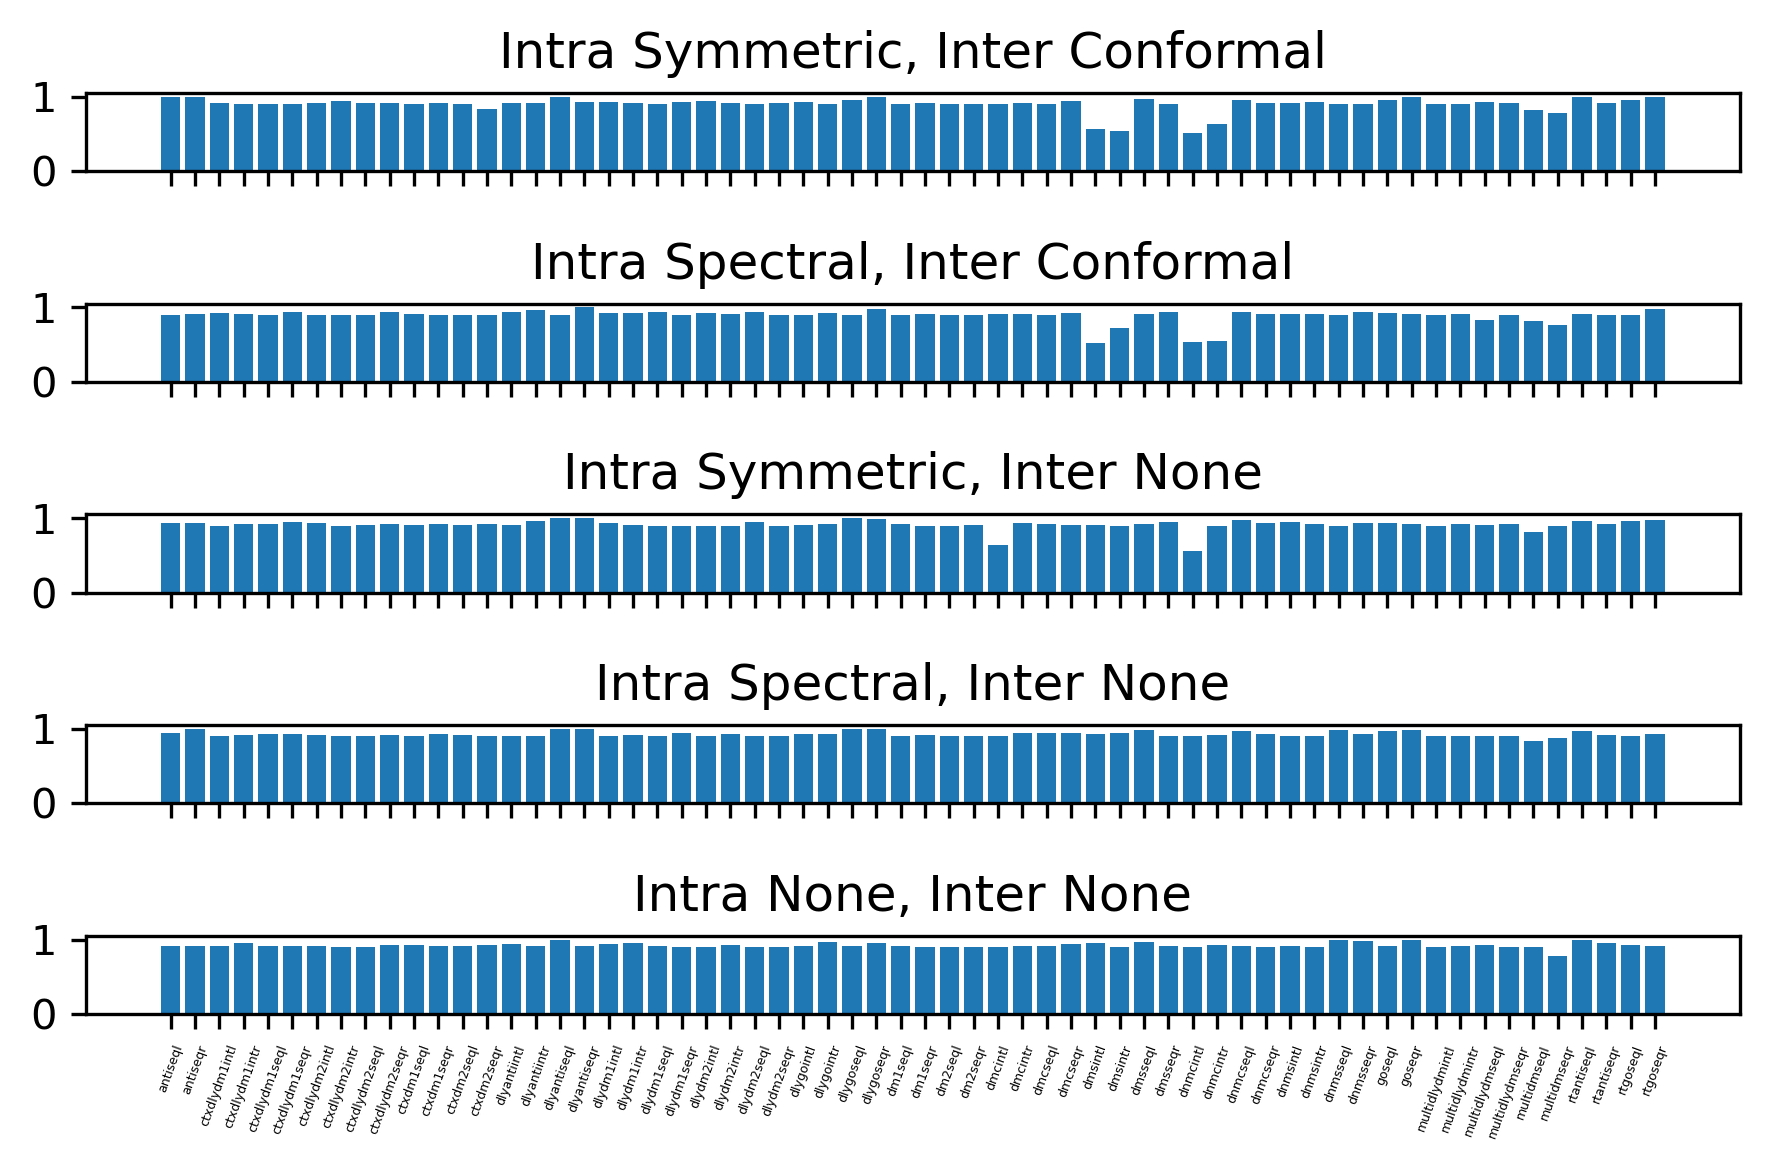

In [80]:
fig, axs = plt.subplots(5,1,dpi = 300,sharex = True)



#plt.hist(sym_scores)
y_pos = np.arange(len(sym_scores))

# Create bars
axs[0].bar(y_pos, sym_scores)

# Create names on the x-axis
axs[0].set_xticks(y_pos)
axs[0].set_xticklabels(sym_tasks,rotation=70,fontsize = 3)
axs[0].set_title('Intra Symmetric, Inter Conformal')




#plt.hist(sym_scores)
y_pos = np.arange(len(spectral_scores))

# Create bars
axs[1].bar(y_pos, spectral_scores)

# Create names on the x-axis
axs[1].set_xticks(y_pos)
axs[1].set_xticklabels(spectral_tasks,rotation=70,fontsize = 3)
axs[1].set_title('Intra Spectral, Inter Conformal')



#plt.hist(sym_scores)
y_pos = np.arange(len(intra_sym_inter_none_scores))

# Create bars
axs[2].bar(y_pos, intra_sym_inter_none_scores)

# Create names on the x-axis
axs[2].set_xticks(y_pos)
axs[2].set_xticklabels(intra_sym_inter_none_tasks,rotation=70,fontsize = 3)
axs[2].set_title('Intra Symmetric, Inter None')




#plt.hist(sym_scores)
y_pos = np.arange(len(intra_spec_inter_none_scores))

# Create bars
axs[3].bar(y_pos, intra_spec_inter_none_scores)

# Create names on the x-axis
axs[3].set_xticks(y_pos)
axs[3].set_xticklabels(intra_spec_inter_none_tasks,rotation=70,fontsize = 3)
axs[3].set_title('Intra Spectral, Inter None')


#plt.hist(sym_scores)
y_pos = np.arange(len(intra_none_inter_none_scores))

# Create bars
axs[4].bar(y_pos, intra_none_inter_none_scores)

# Create names on the x-axis
axs[4].set_xticks(y_pos)
axs[4].set_xticklabels(intra_none_inter_none_tasks,rotation=70,fontsize = 3)
axs[4].set_title('Intra None, Inter None')

# Show graphic
#plt.show()
plt.tight_layout()

Analyzing Robustness


In [120]:
from neurogym import Dataset
from Mod_Cog.mod_cog_tasks import *
task = 'dlydm2intr'

envs, env_names = tasks.load_all_mod_cog_tasks()

# define task here

device = "cuda" if torch.cuda.is_available() else "cpu"


dataset = Dataset(ctxdm2seql(), batch_size=64, seq_len=100)
env = dataset.env


tasks_and_constraints  = [(env_names[i],'spectral') for i in range(0,19)]

net_none_none = utils.build_GWNET_from_pretrained(tasks_and_constraints, env, device, gw_hidden_size = 16, interareal_constraint = 'None')
net_none_none.load_state_dict(torch.load('/om2/user/leokoz8/code/rnns-of-rnns/models/None/ctxdm2seql/None/gw_model.pickle'))
    
    
net_spec_conformal =  utils.build_GWNET_from_pretrained(tasks_and_constraints, env, device, gw_hidden_size = 16, interareal_constraint = 'conformal')  
net_spec_conformal.load_state_dict(torch.load('/om2/user/leokoz8/code/rnns-of-rnns/models/spectral/ctxdm2seql/conformal/gw_model.pickle'))

net_sym_conformal =  utils.build_GWNET_from_pretrained(tasks_and_constraints, env, device, gw_hidden_size = 16, interareal_constraint = 'conformal')  
net_sym_conformal.load_state_dict(torch.load('/om2/user/leokoz8/code/rnns-of-rnns/models/sym/ctxdm2seql/conformal/gw_model.pickle'))

<All keys matched successfully>

In [121]:
perfs_with_noise_none_none = []
perfs_with_noise_spec_conformal = []
perfs_with_noise_sym_conformal = []

noises = np.arange(0,0.8,0.1)

for noise in noises:
    perf_with_noise_none_none = running.get_performance(net_none_none, env, device,noise_level = noise)
    perf_with_noise_spec_conformal = running.get_performance(net_spec_conformal, env, device,noise_level = noise)
    perf_with_noise_sym_conformal = running.get_performance(net_sym_conformal, env, device,noise_level = noise)
    
    perfs_with_noise_none_none.append(perf_with_noise_none_none)
    perfs_with_noise_spec_conformal.append(perf_with_noise_spec_conformal)
    perfs_with_noise_sym_conformal.append(perf_with_noise_sym_conformal)
    
    


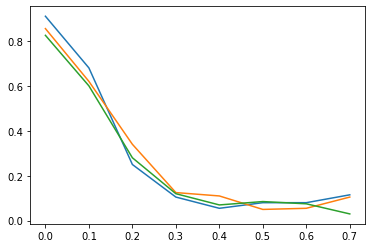

In [122]:

plt.plot(noises,perfs_with_noise_none_none)
plt.plot(noises,perfs_with_noise_spec_conformal)
plt.plot(noises,perfs_with_noise_sym_conformal)